# NOT IMPLEMENTED

Might combine explore and cleaning

In [3]:
import psycopg2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np  
import random
import pandas as pd
import seaborn as sns

## Below uses pandas

In [4]:
# usage: specify file location
filepath = '../Data_git_ignore/clean_corpus_25k.csv'
# filepath = '../Data_git_ignore/clean-100k.csv'

# Create df for the entire file
df = pd.read_csv(filepath, index_col = [0])

In [5]:
# get content_tokenize as series of lists
regex = r" *['\"\[\]]+"
df['content_tokenize'] = df['content_tokenize'].replace(to_replace=regex, value='', regex=True).str.split(',')

In [75]:
# blackList = set(stopwords.words('english'))
# blackList.update(['NUM', 'and'])
# blackList

fake
satire
bias
conspiracy
junksci
hate
clickbait
unreliable
political
reliable


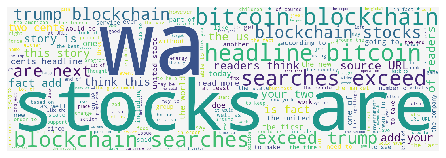

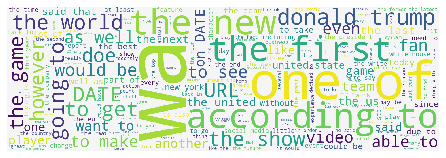

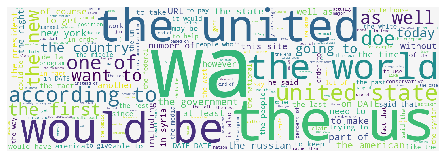

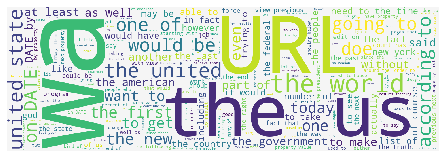

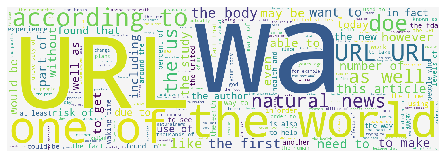

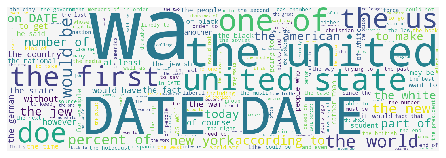

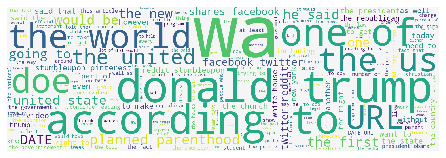

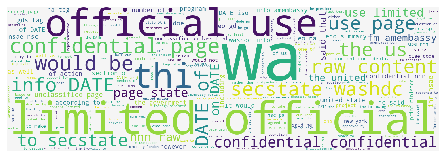

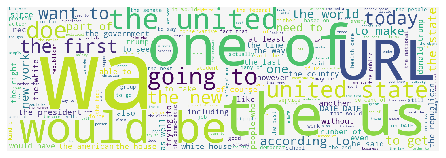

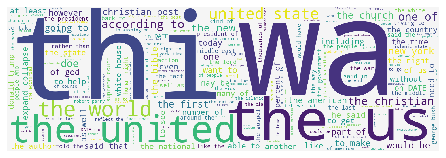

In [141]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords


# Print wordcloud for a given type and save as an image
def wordcloud(df_in=df, article_type='reliable', num=250, path='../Data_sample/wordcloud/', size=(1500,500), removeWords=[]):
    # Get num of articles with given type
    type_text = df_in['content'].loc[df_in['type'] == article_type].head(num)

    # Regex replace - force some words
    regex = r"NUM"
    type_text = type_text.replace(to_replace=regex, value=' ', regex=True)

    # text used by wordcloud
    text = " ".join(article for article in type_text)

    # Create blacklist - combine stopwords with user input
    blackList = set(stopwords.words('english'))
    blackList.update(removeWords)

    # Create the wordcloud object
    wordcloud = WordCloud(font_path=None, width = size[0], height=size[1],  
                max_words=200,  stopwords=blackList, background_color='whitesmoke', max_font_size=None, font_step=1, mode='RGB', 
                collocations=True, colormap=None, normalize_plurals=True).generate(text)
    
    fig = plt.figure()
    ax = plt.axes([0,0,1,1])
    plt.imshow(wordcloud, interpolation="nearest")
    plt.axis('off')
    plt.savefig(path+article_type+'_wordcloud.png', figsize = size, dpi=300)

# Types used in wordcloud
types = df['type'].unique().tolist()

# Blacklist of words
words=['hi','ha']

# # testprint
# wordcloud(removeWords=words)

# Generate wordcloud for each type
for t in types:
    print(t)
    wordcloud(df_in=df, article_type=t, num=5000, removeWords=words)

In [142]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(image_datas[0])
axarr[0,1].imshow(image_datas[1])
axarr[1,0].imshow(image_datas[2])
axarr[1,1].imshow(image_datas[3])

NameError: name 'image_datas' is not defined

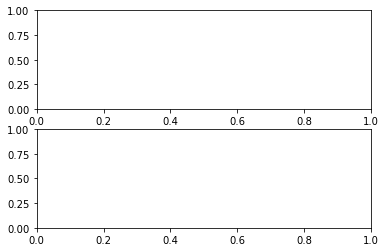

In [33]:
fig,a =  plt.subplots(2,1)

In [28]:

# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.CONTENT: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


AttributeError: 'DataFrame' object has no attribute 'CONTENT'

In [23]:
def display_wordcloud(top_words, title, n_components):
    plt.figure()
    j = np.ceil(n_components/4)
    for t in range(n_components):
        i=t+1
        plt.subplot(j, 4, i).set_title("Topic #" + str(t))
        plt.plot()
        plt.imshow(WordCloud().fit_words(top_words[t]))
        plt.axis("off")
    fig.suptitle(title)
    plt.show()

display_wordcloud(top_words=[text], title="test", n_components=1)

AttributeError: 'str' object has no attribute 'items'

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171649 entries, 1496 to 1706
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                171649 non-null  float64
 1   domain            171649 non-null  object 
 2   type              171649 non-null  object 
 3   url               171649 non-null  object 
 4   content           171649 non-null  object 
 5   scraped_at        171649 non-null  object 
 6   inserted_at       171649 non-null  object 
 7   updated_at        171649 non-null  object 
 8   title             171434 non-null  object 
 9   authors           84560 non-null   object 
 10  keywords          0 non-null       float64
 11  meta_keywords     24862 non-null   object 
 12  meta_description  54711 non-null   object 
 13  tags              71982 non-null   object 
 14  summary           0 non-null       float64
 15  source            0 non-null       float64
 16  type_id           1

In [1]:
import psycopg2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np  
import random
import pandas as pd
import seaborn as sns

In [4]:
def execQuery(query):
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "root",
                                      host = "localhost",
                                      port = "5432",
                                      database = "postgres")
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")

In [16]:
tokens = execQuery(
"""
SELECT  content_tokenize FROM fakenews.article LIMIT 3;
""")

Executed query and closed connection.


In [42]:
len(tokens)
type(tokens)
len(tokens[0])
type(tokens[0])
for t in tokens[:][0][:]:
    print("################->", t)

TypeError: list indices must be integers or slices, not list

In [24]:
#Domains with fake articles after 2018-01-15
execQuery(
"""
SELECT DISTINCT domain_name.domain_name FROM domain_name
INNER JOIN article
ON article.domain_id = domain_name.domain_id
WHERE article.type_id = '7' and scraped_at >= '2018-01-15'

""")

Executed query and closed connection.


[('rickwells.us',),
 ('thecommonsenseshow.com',),
 ('stormcloudsgathering.com',),
 ('dcgazette.com',),
 ('teaparty.org',),
 ('bighairynews.com',),
 ('newslo.com',),
 ('therightscoop.com',),
 ('theinternetpost.net',),
 ('vigilantcitizen.com',),
 ('usatoday.com.co',),
 ('newswithviews.com',),
 ('gopthedailydose.com',),
 ('downtrend.com',),
 ('conservativedailypost.com',),
 ('viralliberty.com',),
 ('weeklyworldnews.com',),
 ('conservativefighters.com',),
 ('coed.com',),
 ('beforeitsnews.com',),
 ('americannews.com',)]

In [29]:
execQuery(
"""
Select COUNT(authorid), domain_name
from 


""")

Executed query and closed connection.


[(Decimal('211'),)]

In [2]:
conn = psycopg2.connect(database='Database1', user ='postgres',password='detminkode', host ='localhost', port='5432')

In [3]:
q4_1 = """SELECT sum(length(content))/COUNT(id) as AvgLen, type
from article
Inner join type
ON article.type_id = type.type_id
GROUP BY type
ORDER BY AvgLen ASC """

In [9]:
q4_1

'Select Count(id)\nfrom article'

In [4]:
df = pd.read_sql_query(q4_1, conn)
df

,avglen,type
0,334,hate
1,1711,clickbait
2,1869,unreliable
3,2603,reliable
4,2655,None
5,2719,bias
6,2779,junksci
7,3977,political
8,3993,fake
9,4958,conspiracy


In [5]:
#test dataframe
df1 = pd.DataFrame()

df1['x'] = random.sample(range(1, 100), 25)
df1['y'] = random.sample(range(1, 100), 25)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

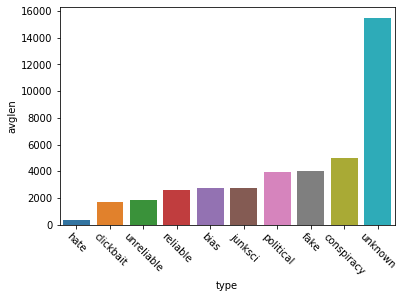

In [15]:
sns.barplot(x='type', y='avglen', data=df)
plt.xticks(rotation = -45)